In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('googleplaystore.csv')


df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
mean_rating = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(mean_rating)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df['Installs'] = df['Installs'].str.replace('Free', '0').str.replace(',', '').str.replace('+', '').astype(int)

df = df.drop_duplicates()

<ipython-input-8-c365f6ebdaf9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('Free', '0').str.replace(',', '').str.replace('+', '').astype(int)


In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.to_csv('cleaned_googleplaystore.csv', index=False)

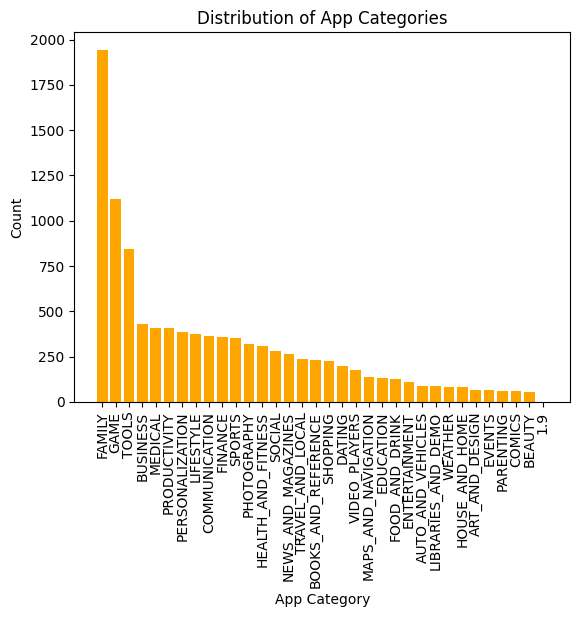

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_googleplaystore.csv')

category_counts = df['Category'].value_counts().sort_values(ascending=False)
plt.bar(category_counts.index, category_counts.values, color='orange')
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Count')
plt.title('Distribution of App Categories')
plt.show()

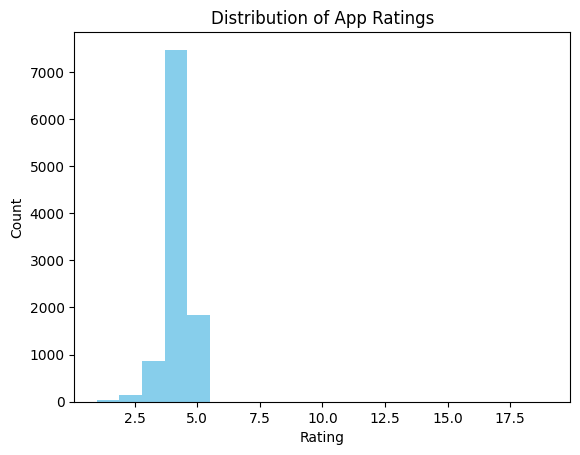

In [12]:
plt.hist(df['Rating'], bins=20, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of App Ratings')
plt.show()

In [13]:
summary_stats = df[['Rating', 'Reviews']].describe()
summary_stats

,Rating
count,10358.000000
mean,4.190079
std,0.505406
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,19.000000


In [14]:
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('cleaned_googleplaystore.csv')

In [16]:
z_scores = stats.zscore(df['Installs'])
threshold = 3
outliers = df['Installs'][z_scores > threshold]
df.loc[z_scores > threshold, 'Installs'] = df['Installs'].median()

In [17]:
df['Rating'] = winsorize(df['Rating'], limits=[0.05, 0.05])


In [18]:
scaler = StandardScaler()
df[['Rating']] = scaler.fit_transform(df[['Rating']])

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,-0.298545,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,-0.831044,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,1.298952,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.766453,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.233954,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cleaned_googleplaystore.csv')

le = LabelEncoder()
df['Type_Encoded'] = le.fit_transform(df['Type'])

df = pd.get_dummies(df, columns=['Content Rating'], prefix='ContentRating', drop_first=True)

pivot_table = df.pivot_table(index='Category', columns='ContentRating_Teen', values='Rating', aggfunc='mean')

In [24]:
pivot_table

ContentRating_Teen,0,1
Category,,
1.9,19.000000,NaN
ART_AND_DESIGN,4.344839,4.466667
AUTO_AND_VEHICLES,4.190715,4.200000
BEAUTY,4.272668,4.064446
BOOKS_AND_REFERENCE,4.313175,4.299683
BUSINESS,4.133126,4.226157
COMICS,4.228597,4.031818
COMMUNICATION,4.146747,4.282152
DATING,4.008030,4.116003
